In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import glob
import xarray as xr

idx = pd.IndexSlice

root_path = r'/mnt/4ba37af6-51fd-47bc-8321-8c500c229114/study/School/KHOA LUAN TOT NGHIEP/'
_thudohanoi_data_path = r'/mnt/4ba37af6-51fd-47bc-8321-8c500c229114/study/School/KHOA LUAN TOT NGHIEP/Data/thudohanoi/refined_data'
_thudohanoi_files = glob.glob(_thudohanoi_data_path + '/*.csv')

thudohanoi_df = pd.DataFrame()
for file in _thudohanoi_files:
    print('Currently processing file \n{}'.format(file))
    thudohanoi_df = thudohanoi_df.append(pd.read_csv(file, parse_dates=True, index_col=['site_id', 'time'],
                                                    dtype={'CO': np.float64, 'NO2': np.float64,'PM25': np.float64,
                                                          'AQI_h': np.float64, 'AQI_h_I': np.int, 'site_id': np.int}))
    
# Remove site 16 because of some inconsistency in data
thudohanoi_df = thudohanoi_df[(thudohanoi_df.index.get_level_values(0) != 16)]

Currently processing file 
/mnt/4ba37af6-51fd-47bc-8321-8c500c229114/study/School/KHOA LUAN TOT NGHIEP/Data/thudohanoi/refined_data/30.csv
Currently processing file 
/mnt/4ba37af6-51fd-47bc-8321-8c500c229114/study/School/KHOA LUAN TOT NGHIEP/Data/thudohanoi/refined_data/9.csv
Currently processing file 
/mnt/4ba37af6-51fd-47bc-8321-8c500c229114/study/School/KHOA LUAN TOT NGHIEP/Data/thudohanoi/refined_data/32.csv
Currently processing file 
/mnt/4ba37af6-51fd-47bc-8321-8c500c229114/study/School/KHOA LUAN TOT NGHIEP/Data/thudohanoi/refined_data/11.csv
Currently processing file 
/mnt/4ba37af6-51fd-47bc-8321-8c500c229114/study/School/KHOA LUAN TOT NGHIEP/Data/thudohanoi/refined_data/40.csv
Currently processing file 
/mnt/4ba37af6-51fd-47bc-8321-8c500c229114/study/School/KHOA LUAN TOT NGHIEP/Data/thudohanoi/refined_data/28.csv
Currently processing file 
/mnt/4ba37af6-51fd-47bc-8321-8c500c229114/study/School/KHOA LUAN TOT NGHIEP/Data/thudohanoi/refined_data/49.csv
Currently processing file 
/

<ipython-input-23-b9f1fab685eb>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(label, fontsize=13, rotation=350)


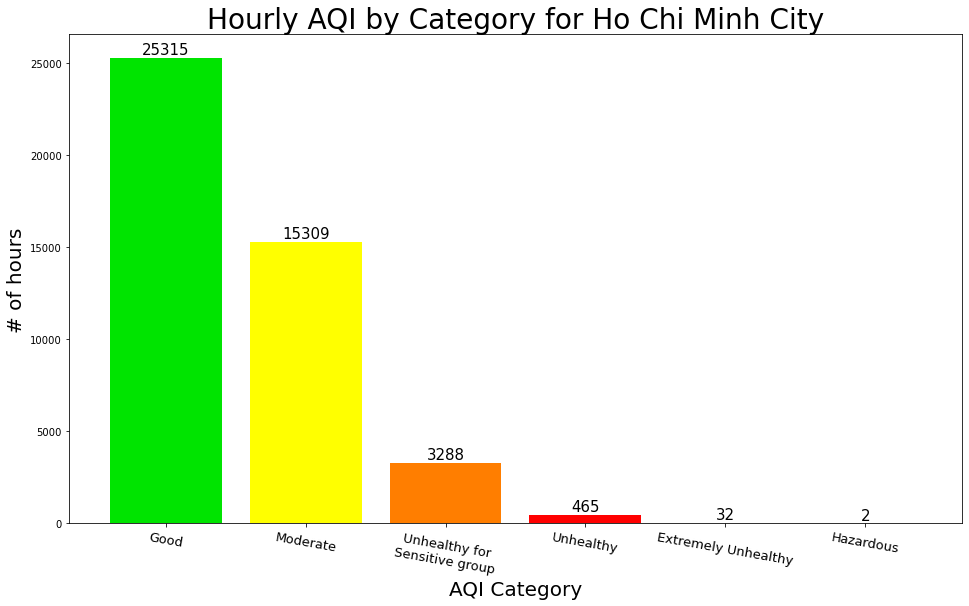

In [23]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
color = ['#00e400', '#ffff00', '#ff7e00', '#ff0000', '#8f3f97', '#7e0023']
label = ['tmp', 'Good', 'Moderate', 'Unhealthy for\nSensitive group', 'Unhealthy', 'Extremely Unhealthy', 'Hazardous']
counts = thudohanoi_df[thudohanoi_df.index.get_level_values(0) == 49].groupby('AQI_h_I').size()
ax.bar(x = thudohanoi_df['AQI_h_I'].unique(),height=counts, color=color)
ax.set_xticklabels(label, fontsize=13, rotation=350)
ax.set_xlabel("AQI Category", fontsize=20)
ax.set_ylabel("# of hours", fontsize=20)
ax.set_title("Hourly AQI by Category for Ho Chi Minh City", fontsize=28)
for i, val in enumerate(counts):
    ax.text(i + 1, val + 200, round(val, 1), horizontalalignment = 'center', fontsize=15)
fig.savefig("Hourly AQI by Category for Ho Chi Minh City")

<ipython-input-22-99446f7722b5>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(label, fontsize=13, rotation=350)


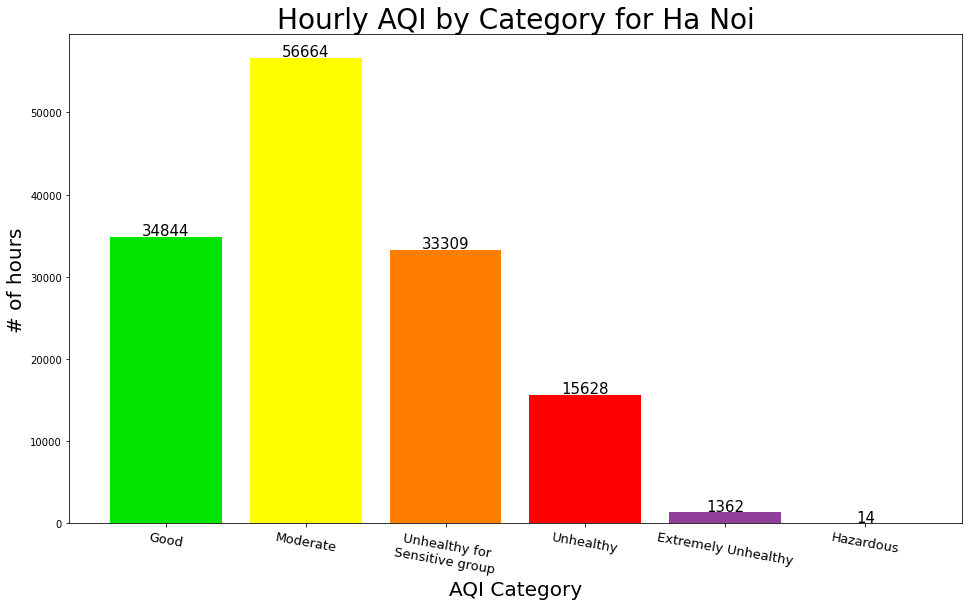

In [22]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
color = ['#00e400', '#ffff00', '#ff7e00', '#ff0000', '#8f3f97', '#7e0023']
label = ['tmp', 'Good', 'Moderate', 'Unhealthy for\nSensitive group', 'Unhealthy', 'Extremely Unhealthy', 'Hazardous']
counts = thudohanoi_df[thudohanoi_df.index.get_level_values(0) != 49].groupby('AQI_h_I').size()
ax.bar(x = thudohanoi_df['AQI_h_I'].unique(),height=counts, color=color)
ax.set_xticklabels(label, fontsize=13, rotation=350)
ax.set_xlabel("AQI Category", fontsize=20)
ax.set_ylabel("# of hours", fontsize=20)
ax.set_title("Hourly AQI by Category for Ha Noi", fontsize=28)
for i, val in enumerate(counts):
    ax.text(i + 1, val + 200, round(val, 1), horizontalalignment = 'center', fontsize=15)
fig.savefig("Hourly AQI by Category for Ha Noi")

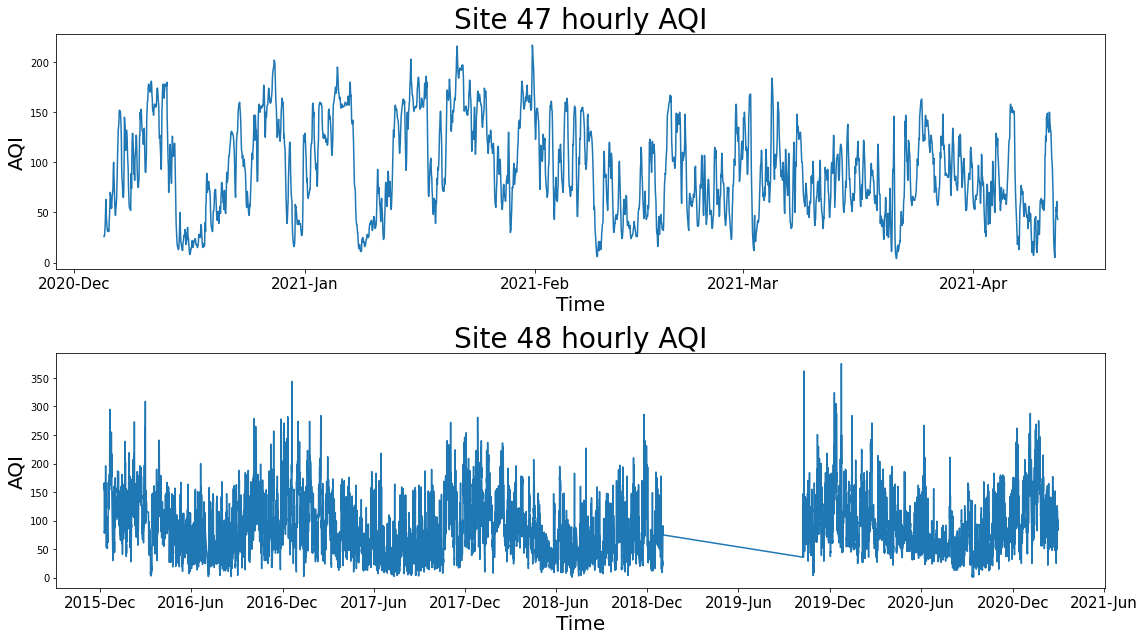

In [21]:
import random
import matplotlib.dates as mdates

site_ids = thudohanoi_df.index.get_level_values(0).unique()
tmp = thudohanoi_df[thudohanoi_df.index.get_level_values(0) == 47].copy()
#     n = random.randint(0, len(tmp) - 200)
fig = plt.figure(figsize=(16,9))
gs = fig.add_gridspec(ncols=1, nrows=2)
ax1 = fig.add_subplot(gs[0,0])
ax1.plot(tmp.index.get_level_values(1), tmp.iloc[:,2].values)
ax1.set_xlabel("Time", fontsize=20)
ax1.set_ylabel("AQI", fontsize=20)
ax1.set_title("Site {} hourly AQI".format(47), fontsize=28)
locator = mdates.MonthLocator(bymonthday=1)
fmt = mdates.DateFormatter('%Y-%b')
Xaxis = ax1.xaxis
Xaxis.set_major_locator(locator)
Xaxis.set_major_formatter(fmt)
ax1.tick_params(axis="x", labelsize=15)
# fig.savefig("Site {} hourly AQI.png".format(site))

tmp = thudohanoi_df[thudohanoi_df.index.get_level_values(0) == 48].copy()
ax2 = fig.add_subplot(gs[1,0])
ax2.plot(tmp.index.get_level_values(1), tmp.iloc[:,2].values)
ax2.set_xlabel("Time", fontsize=20)
ax2.set_ylabel("AQI", fontsize=20)
ax2.set_title("Site {} hourly AQI".format(48), fontsize=28)
locator = mdates.MonthLocator(bymonthday=1, interval=6)
fmt = mdates.DateFormatter('%Y-%b')
Xaxis = ax2.xaxis
Xaxis.set_major_locator(locator)
Xaxis.set_major_formatter(fmt)
ax2.tick_params(axis="x", labelsize=15)
fig.set_tight_layout(True)
fig.savefig("Site hourly AQI.png")
plt.show()